In [1]:
import pandas as pd
import numpy as np
import cvxpy as cp

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
import MyDecoder as decoder

# for automatically reloading the imported modules
%load_ext autoreload
%autoreload 2

In [3]:
def make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,c,test):
    AVG_Hamming_err_list = np.average(Hamming_err_lists,axis=0)
    AVG_FN_list = np.average(FN_lists,axis=0)
    AVG_FP_list = np.average(FP_lists,axis=0)

    plt.subplot(1,3,1)
    for i in range(num_trial):
        #plt.plot(T_list, Hamming_err_lists[i], label = "Hamming Err", color='blue', alpha=0.3)
        plt.plot(T_list, Hamming_err_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_Hamming_err_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_Hamming_err_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.ylabel("Hamming Error Rate")
    plt.title("T (number of tests) vs Hamming, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,2)
    for i in range(num_trial):
        plt.plot(T_list, FN_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_FN_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_FN_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.ylabel("False Negative")
    plt.title("T (number of tests) vs False Negative, p = "+str(p)+", n = "+str(n))
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(1,3,3)
    for i in range(num_trial):
        plt.plot(T_list, FP_lists[i],'o', color=c, alpha=0.3);   
    plt.plot(T_list, AVG_FP_list, label = test, linewidth = 3, color=c)
    plt.plot(T_list, AVG_FP_list,'o', color=c)
    plt.xlabel("T (number of tests)")
    plt.title("T (number of tests) vs False Positive p = "+str(p)+", n = "+str(n))
    plt.ylabel("False Positive")
    plt.grid(True)
    plt.legend(loc='upper right')

    fig.set_size_inches(18, 4)

In [4]:
def run_lp_trials(n, m, p, q, T_list, num_trial,func=decoder.lp,args=None):
    Hamming_err_lists = []
    FN_lists = []
    FP_lists = []

    for i in range(num_trial):
        Hamming_err_list = []
        FN_list = []
        FP_list = []

        for T in T_list:
            X, ppl, y, A= decoder.generator_nonoverlapping(n, q, p, m, T)
            try:
                ppl_pred  = func(X,y,A,args)
            except TypeError:
                try:
                    ppl_pred  = func(X,y,A)
                except TypeError:
                    ppl_pred  = func(X,y)
            print("Solved Trial: ",i, " for T=",T)
            Hamming_err = sum(ppl_pred != ppl)/n
            Hamming_err_list.append(Hamming_err)

            positive_mask = (ppl == 1)
            FN = sum(ppl_pred[positive_mask] == 0) / sum(positive_mask)
            FN_list.append(FN)

            negative_mask = (ppl == 0)
            FP = sum(ppl_pred[negative_mask] == 1) / sum(negative_mask)
            FP_list.append(FP)

        Hamming_err_lists.append(Hamming_err_list)
        FN_lists.append(FN_list)
        FP_lists.append(FP_list)
    
    return Hamming_err_lists, FN_lists, FP_lists

Solved Trial:  0  for T= 100
Solved Trial:  0  for T= 300
Solved Trial:  0  for T= 500
Solved Trial:  0  for T= 1000
Solved Trial:  1  for T= 100
Solved Trial:  1  for T= 300
Solved Trial:  1  for T= 500
Solved Trial:  1  for T= 1000
Solved Trial:  2  for T= 100
Solved Trial:  2  for T= 300
Solved Trial:  2  for T= 500
Solved Trial:  2  for T= 1000
Solved Trial:  3  for T= 100
Solved Trial:  3  for T= 300
Solved Trial:  3  for T= 500
Solved Trial:  3  for T= 1000
Solved Trial:  4  for T= 100
Solved Trial:  4  for T= 300
Solved Trial:  4  for T= 500
Solved Trial:  4  for T= 1000
Solved Trial:  5  for T= 100
Solved Trial:  5  for T= 300
Solved Trial:  5  for T= 500
Solved Trial:  5  for T= 1000
Solved Trial:  6  for T= 100
Solved Trial:  6  for T= 300
Solved Trial:  6  for T= 500
Solved Trial:  6  for T= 1000
Solved Trial:  7  for T= 100
Solved Trial:  7  for T= 300
Solved Trial:  7  for T= 500
Solved Trial:  7  for T= 1000
Solved Trial:  8  for T= 100
Solved Trial:  8  for T= 300
Solved

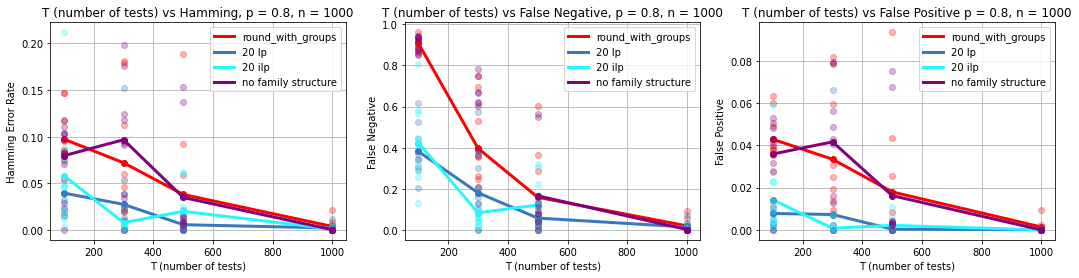

In [5]:
n = 1000                      # size of population
m = 50                         #number of families
p = 0.8                         #probability of infection
q = 0.1                         #probability of a family to be chosen as infected                       #number of tests
p_noisy = 0.1     
T_list = [100,300,500,1000]
num_trial = 10

fig = plt.figure(1)
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.round_with_groups)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'red','round_with_groups')
import matplotlib.colors as colors
colors_list = list(colors._colors_full_map.values())
for i in [20]:
    Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_lp,i)
    make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[i],str(i)+" lp")
    Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.alternate_ilp,i)
    make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,colors_list[((i+7)*100)%727],str(i)+" ilp")
#Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial,decoder.integer_group_lp)
#make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'green')
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n, m, p, q, T_list, num_trial)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'purple','no family structure')

Solved Trial:  0  for T= 100
Solved Trial:  0  for T= 200
Solved Trial:  0  for T= 300
Solved Trial:  0  for T= 400
Solved Trial:  0  for T= 500
Solved Trial:  0  for T= 600
Solved Trial:  0  for T= 700
Solved Trial:  1  for T= 100
Solved Trial:  1  for T= 200
Solved Trial:  1  for T= 300
Solved Trial:  1  for T= 400
Solved Trial:  1  for T= 500
Solved Trial:  1  for T= 600
Solved Trial:  1  for T= 700
Solved Trial:  2  for T= 100
Solved Trial:  2  for T= 200
Solved Trial:  2  for T= 300
Solved Trial:  2  for T= 400
Solved Trial:  2  for T= 500
Solved Trial:  2  for T= 600
Solved Trial:  2  for T= 700
Solved Trial:  3  for T= 100
Solved Trial:  3  for T= 200
Solved Trial:  3  for T= 300
Solved Trial:  3  for T= 400
Solved Trial:  3  for T= 500
Solved Trial:  3  for T= 600
Solved Trial:  3  for T= 700
Solved Trial:  4  for T= 100
Solved Trial:  4  for T= 200
Solved Trial:  4  for T= 300
Solved Trial:  4  for T= 400
Solved Trial:  4  for T= 500
Solved Trial:  4  for T= 600
Solved Trial: 

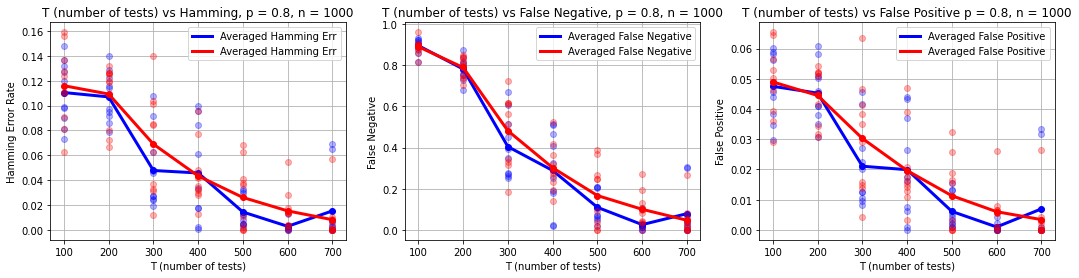

In [20]:
n = 1000                      # size of population
m = 200                          #number of families
p = 0.8                         #probability of infection
q = 0.1                         #probability of a family to be chosen as infected
T_list = range(100, 800, 100)
num_trial = 10

Hamming_err_lists_int, FN_lists_int, FP_lists_int = run_lp_trials(n,m,p,q, T_list, num_trial)
Hamming_err_lists, FN_lists, FP_lists = run_lp_trials(n,m,p,q, T_list, num_trial)

fig = plt.figure(1)
make_plot(n,p, q, Hamming_err_lists, FN_lists, FP_lists, T_list, num_trial,'blue')
make_plot(n,p, q,Hamming_err_lists_int, FN_lists_int, FP_lists_int,T_list, num_trial,'red')
plt.show()

In [5]:
n = 1000                      # size of population
m = 20                          #number of families
p = 0.8                         #probability of infection
q = 0.1                         #probability of a family to be chosen as infected
T = 100                        #number of tests
p_noisy = 0.1     




In [6]:
X, ppl, y, A=decoder.generator_nonoverlapping(n, q, p, m, T)
z_no_fam=decoder.int_lp(X,y)

Using license file /Users/sam/gurobi.lic
Academic license - for non-commercial use only - expires 2021-02-03


In [7]:
#ppl_pred_1=decoder.round_with_groups(X,y,A)
#ppl_pred_2=decoder.integer_group_lp(X,y,A)
ppl_pred_3=decoder.relaxed_int_group_lp(X,y,A)


NameError: name 'y' is not defined

In [21]:
print(sum(abs(ppl-ppl_pred_1)))
print(sum(abs(ppl-ppl_pred_2)))
print(sum(abs(ppl-ppl_pred_3)))
print(sum(abs(ppl-z_no_fam)))
print(sum(ppl))

168.0
166.0
176.0
166.0
117.0
